# GDP vs Stock Market

Here I try to find out if the relation between GDP and the Stock market is really as direct as we think it is or is there a catch.

I'm referring the Standard and Poor's 500 index (S&P 500) to get the stock market data as it represents the overall condition of the market. Also, this comparison is only restricted to USA data as the GDP used here and S&P 500 index both represent the USA data.

The data is collected for a time range of 70 years i.e. 1948 to 2018. Also each data point represents the data as of 1st of January of respective years

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
#Reading the data from github repository
gdp = pd.read_csv("https://raw.githubusercontent.com/vaibhav2202/dataset-assi4/master/GDP.csv")
snp = pd.read_csv("https://raw.githubusercontent.com/vaibhav2202/dataset-assi4/master/snp_csv.csv")

In [3]:
#Data cleaning
gdp['DATE'] = gdp['DATE'].apply(pd.to_datetime)
snp['Date'] = snp['Date'].apply(pd.to_datetime)

gdp = gdp[(gdp['DATE'].dt.year >= 1948) & (gdp['DATE'].dt.year <= 2018)] #Restricting the data to show between 1948 and 2018

snp = snp[(snp['Date'].dt.month == 1) &
    (snp['Date'].dt.year >= 1948)]

gdp.set_index('DATE', inplace = True)
snp.set_index('Date', inplace = True)

df = gdp.join(snp['SP500'], how = 'inner')

*Note* - The x axis is shared between both the plots however, each plot has its own Y axis labelled accordingly since the scales at which both the plots operate are very different where the GDP is calculated in Billions of Dollars whereas the stock market prices are represented by the index price in dollars.
This study aims to find a co-relation and discrepancies in the trends of both the plots and is less concerned with the actual price changes

<IPython.core.display.Javascript object>


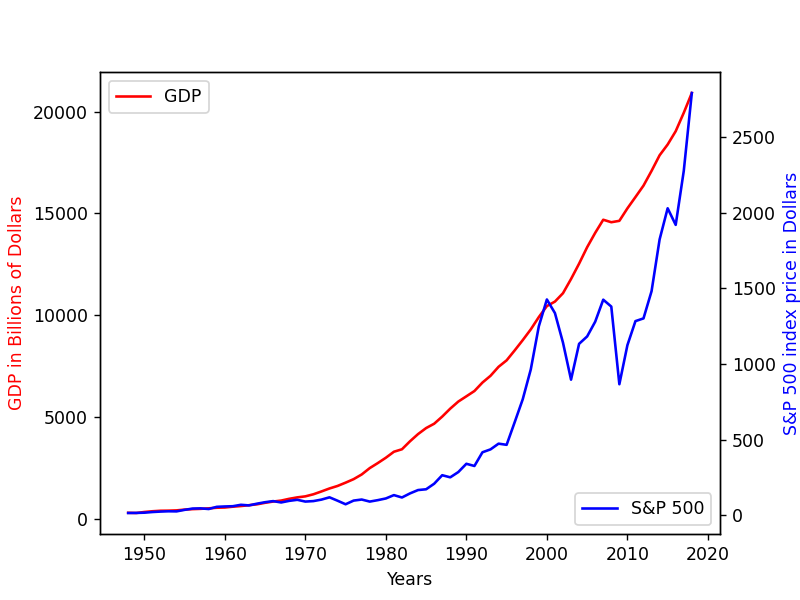

In [4]:
plt.figure()

ax1 = plt.gca()

ax1.plot(df['GDP'], color = 'red', label = 'GDP')

ax1.set_xlabel("Years", color = 'black')
ax1.set_ylabel("GDP in Billions of Dollars", color = 'red')

ax2 = ax1.twinx()

ax2.plot(df['SP500'], color = 'blue', label = 'S&P 500')
ax2.set_ylabel("S&P 500 index price in Dollars", color = 'blue')

ax1.legend(loc = 'upper left')
ax2.legend(loc = 'lower right')


## Conclusion

Although the stock market prices rise with the rising GDP, the co-relation is not so clear as we can see that the GDP was increasing at a much higher pace than the stock market till 1994 and even when the stock market tried to catch up, we experienced 2 heavy crashes in the stock market in 2003 and 2008 due to the dot com bubble and real estate financial collapse respectively.

Therefore, in conclusion, it seems that although the stock market rises with the rising GDP and tries to catch up, the stock market is vulnerable to sudden crashes and they can't be predicted just looking at the GDP.